# Walmart Model Evaluator - Complete Documentation

## Overview

The `WalmartModelEvaluator` class provides a comprehensive evaluation framework specifically designed for the Walmart Sales Forecasting Competition. This system implements competition-specific metrics, advanced analytical methods, and business-focused visualizations to assess and compare multiple forecasting models.

## Table of Contents

1. [Core Design Philosophy](#core-design-philosophy)
2. [Competition-Specific Metrics](#competition-specific-metrics)
3. [Evaluation Methodologies](#evaluation-methodologies)
4. [Analytical Components](#analytical-components)
5. [Visualization Framework](#visualization-framework)
6. [Business Intelligence Features](#business-intelligence-features)
7. [Usage Guidelines](#usage-guidelines)

---

## Core Design Philosophy

### Competition-Centric Approach
The evaluator is specifically designed around the Walmart Sales Forecasting Competition requirements, where:
- **Holiday weeks receive 5x weight** in scoring
- **Weighted RMSE** is the primary competition metric
- **Department-level aggregation** is critical for business decisions
- **Multi-horizon forecasting** reflects real-world planning needs

### Business-Focused Evaluation
Beyond academic metrics, the system provides:
- **Operational feasibility** assessment (training time, computational resources)
- **Risk analysis** through sensitivity testing
- **Interpretability** considerations for stakeholder communication
- **Production readiness** evaluation

---

## Competition-Specific Metrics

### 1. Weighted Mean Squared Error (Weighted RMSE)

#### Methodology
```python
weighted_errors = weights * np.square(actual - predicted)
weighted_mse = np.sum(weighted_errors) / np.sum(weights)
weighted_rmse = np.sqrt(weighted_mse)
```

#### Rationale
- **Primary competition metric** used for official ranking
- **Holiday amplification**: Errors during holiday weeks (weight > 1) are magnified 5x
- **Business justification**: Holiday sales are critical for annual revenue and inventory planning
- **Mathematical soundness**: Maintains MSE properties while emphasizing high-impact periods

#### When to Use
- **Primary model selection** for competition submission
- **Business impact assessment** where holiday performance drives profitability
- **Risk management** when holiday forecasting errors have severe consequences

### 2. Holiday vs Non-Holiday Performance Decomposition

#### Methodology
```python
holiday_mask = weights > 1
holiday_rmse = np.sqrt(mean_squared_error(actual[holiday_mask], predicted[holiday_mask]))
non_holiday_rmse = np.sqrt(mean_squared_error(actual[non_holiday_mask], predicted[non_holiday_mask]))
```

#### Rationale
- **Separate evaluation contexts**: Holiday and regular periods have different dynamics
- **Model specialization**: Some models excel in stable periods, others in volatile holiday periods
- **Business planning**: Different strategies needed for holiday vs regular inventory management
- **Error attribution**: Understanding whether poor performance comes from holidays or baseline periods

#### Business Impact
- **Inventory planning**: Holiday forecasts drive seasonal stock decisions
- **Staff scheduling**: Holiday performance affects workforce planning
- **Marketing spend**: Holiday accuracy influences promotional budget allocation

### 3. Directional Accuracy

#### Methodology
```python
actual_direction = np.diff(actual) > 0
pred_direction = np.diff(predicted) > 0
directional_accuracy = np.mean(actual_direction == pred_direction) * 100
```

#### Rationale
- **Trend identification**: Captures whether models predict correct directional changes
- **Business decision support**: Often more important to know direction than exact magnitude
- **Risk mitigation**: Helps avoid counter-trend inventory decisions
- **Leading indicator**: Directional changes often matter more than absolute values for planning

#### When to Prioritize
- **Strategic planning**: Long-term trend identification
- **Resource allocation**: Deciding whether to increase or decrease capacity
- **Market timing**: Understanding when to launch promotions or campaigns

---

## Evaluation Methodologies

### 1. Sensitivity Analysis

#### Purpose
Evaluate model robustness and stability across different conditions and data variations.

#### Components

##### A. Prediction Volatility
```python
pred_volatility = np.std(predicted)
volatility_ratio = pred_volatility / actual_volatility
```

**Rationale:**
- **Stability assessment**: High volatility may indicate overfitting or instability
- **Business risk**: Volatile predictions complicate planning and inventory management
- **Confidence evaluation**: Lower volatility (when appropriate) suggests more reliable forecasts

**Interpretation:**
- `volatility_ratio < 1`: Model under-predicts variability (may miss peaks/troughs)
- `volatility_ratio ≈ 1`: Model captures appropriate variability
- `volatility_ratio > 1`: Model over-predicts variability (may be too reactive)

##### B. Outlier Sensitivity
```python
q75, q25 = np.percentile(residuals, [75, 25])
iqr = q75 - q25
outlier_sensitivity = len(residuals[(residuals < q25 - 1.5 * iqr) | (residuals > q75 + 1.5 * iqr)]) / len(residuals)
```

**Rationale:**
- **Robustness measurement**: How much do extreme values affect model performance
- **Data quality tolerance**: Models with low outlier sensitivity are more forgiving of data issues
- **Business continuity**: Robust models maintain performance despite unexpected events

**Business Application:**
- **Data quality assessment**: Understanding model tolerance to data collection issues
- **Exceptional event handling**: How well models cope with unusual market conditions
- **Production reliability**: Lower sensitivity means more stable performance in practice

##### C. Trend Sensitivity
```python
actual_trend = np.polyfit(range(len(actual)), actual, 1)[0]
pred_trend = np.polyfit(range(len(predicted)), predicted, 1)[0]
trend_sensitivity = abs(actual_trend - pred_trend) / abs(actual_trend)
```

**Rationale:**
- **Long-term accuracy**: Measures how well models capture underlying trends
- **Strategic planning support**: Trend accuracy critical for long-term business decisions
- **Model validation**: Ensures models aren't just fitting noise but capturing true patterns

### 2. Forecast Horizon Analysis

#### Purpose
Evaluate performance degradation as forecast horizon increases, reflecting real-world planning needs.

#### Methodology
```python
# Short-term (1-4 steps): Operational planning
# Medium-term (5-8 steps): Tactical planning  
# Long-term (9-12 steps): Strategic planning
```

#### Rationale
- **Planning alignment**: Different horizons serve different business functions
- **Model selection**: Some models excel at short-term, others at long-term forecasting
- **Risk assessment**: Understanding where and when model performance degrades
- **Resource allocation**: Matching model capabilities to planning requirements

#### Business Applications

**Short-term (1-4 weeks):**
- **Inventory replenishment**: Immediate stock decisions
- **Staff scheduling**: Weekly workforce planning
- **Promotional planning**: Near-term campaign adjustments

**Medium-term (5-8 weeks):**
- **Seasonal preparation**: Holiday inventory buildup
- **Supplier coordination**: Lead time planning
- **Budget adjustments**: Monthly/quarterly revisions

**Long-term (9-12 weeks):**
- **Strategic planning**: Annual budget cycles
- **Capacity planning**: Facility and infrastructure decisions
- **Contract negotiations**: Long-term supplier agreements

---

## Analytical Components

### 1. Model Type Performance Analysis

#### Methodology
```python
type_performance = {}
for model, metrics in self.metrics.items():
    model_type = metrics["Model_Type"]
    type_performance[model_type].append(metrics["Weighted_RMSE"])
```

#### Rationale
- **Architecture comparison**: Understanding which model families perform best
- **Technology strategy**: Informing investment in different ML capabilities
- **Risk diversification**: Balancing portfolio across different model types
- **Resource planning**: Aligning team skills with successful model types

#### Model Type Categories

**Neural Networks:**
- **Strengths**: Complex pattern recognition, automatic feature learning
- **Weaknesses**: Computational requirements, interpretability challenges
- **Best for**: Large datasets, complex seasonal patterns

**Statistical Models:**
- **Strengths**: Interpretability, theoretical foundation, uncertainty quantification
- **Weaknesses**: Linear assumptions, manual feature engineering
- **Best for**: Regulatory compliance, small datasets, baseline models

**Probabilistic Models:**
- **Strengths**: Uncertainty quantification, Bayesian framework
- **Weaknesses**: Computational complexity, scaling limitations
- **Best for**: Risk assessment, small datasets, prior knowledge incorporation

### 2. Computational Complexity Analysis

#### Methodology
```python
for model, metrics in sorted(self.metrics.items(), key=lambda x: x[1]["Training_Time"]):
    print(f"  {model}: {metrics['Training_Time']:.2f}s ({metrics['Model_Type']})")
```

#### Rationale
- **Production feasibility**: Understanding computational requirements for deployment
- **Cost-benefit analysis**: Balancing accuracy gains against computational costs
- **Scalability planning**: Assessing ability to handle larger datasets or more frequent retraining
- **Resource budgeting**: Planning computational infrastructure needs

#### Business Considerations
- **Real-time requirements**: How quickly models can generate new forecasts
- **Infrastructure costs**: Cloud computing or hardware requirements
- **Update frequency**: How often models can be retrained with new data
- **Operational complexity**: Skills and tools needed for model maintenance

---

## Visualization Framework

### 1. Competition Ranking Dashboard

#### Purpose
Visual representation of model performance using competition-specific metrics.

#### Components
- **Weighted RMSE bar chart**: Primary competition ranking
- **Holiday vs Non-Holiday performance**: Critical business breakdown
- **Training time comparison**: Operational feasibility assessment

#### Design Rationale
- **Gold highlighting**: Best model clearly identified for decision-making
- **Value labels**: Precise metrics for detailed comparison
- **Color coding**: Red for holidays (high impact), blue for regular periods

### 2. Model Type Performance Analysis

#### Purpose
Strategic view of different modeling approaches and their effectiveness.

#### Methodology
```python
type_rmse = [np.mean(type_performance[t]) for t in type_names]
```

#### Business Value
- **Technology strategy**: Which model families to invest in
- **Team development**: Skills and capabilities to build
- **Portfolio planning**: Balancing different approaches for risk mitigation

### 3. Accuracy vs Speed Trade-off Analysis

#### Purpose
Visual representation of the classic ML trade-off between accuracy and computational efficiency.

#### Methodology
```python
accuracy_scores = [1 / self.metrics[m]["Weighted_RMSE"] * 100000 for m in models]
scatter = axes[1, 1].scatter(training_times, accuracy_scores, ...)
```

#### Business Applications
- **Production planning**: Selecting models that meet both accuracy and speed requirements
- **Resource allocation**: Understanding where to invest computational resources
- **Service level decisions**: Balancing forecast quality against response time

### 4. Actual vs Predicted Scatter Plot

#### Purpose
Detailed analysis of prediction quality with business context highlighting.

#### Design Features
- **Holiday highlighting**: Red points for holiday weeks (higher business impact)
- **Perfect prediction line**: Visual reference for ideal performance
- **Point sizing**: Holiday points larger to emphasize importance

#### Interpretation Guide
- **Points on diagonal**: Perfect predictions
- **Vertical spread**: Prediction uncertainty
- **Horizontal clusters**: Systematic biases
- **Holiday clustering**: Specialized holiday performance patterns

---

## Business Intelligence Features

### 1. Summary Report Generation

#### Purpose
Executive-level summary with actionable insights and recommendations.

#### Components

##### Performance Summary
- **Best overall accuracy**: Competition winner identification
- **Best explanatory power**: R² leader for business understanding
- **Fastest training**: Operational efficiency leader

##### Key Insights Generation
```python
if nn_avg_rmse < stat_avg_rmse:
    print(f"Neural Networks outperform Statistical models...")
```

**Rationale:**
- **Technology direction**: Data-driven recommendations for model architecture
- **Investment prioritization**: Where to focus development resources
- **Risk assessment**: Understanding trade-offs between different approaches

##### Business Recommendations
- **Production deployment**: Best model for competition submission
- **Rapid prototyping**: Fastest model for experimentation
- **Interpretability needs**: Most explainable models for stakeholder communication
- **Strategic focus**: Holiday performance optimization

### 2. Time Series Visualization

#### Purpose
Temporal analysis showing model performance over time with business context.

#### Features
- **Actual vs predicted overlay**: Direct performance comparison
- **Holiday period highlighting**: Orange vertical lines for high-impact weeks
- **Interactive legends**: Clear identification of different series

#### Business Value
- **Pattern identification**: Understanding when models succeed or fail
- **Seasonal analysis**: Holiday performance evaluation
- **Trend validation**: Confirming model captures business cycles
- **Stakeholder communication**: Clear visual for business presentations

---

## Usage Guidelines

### 1. Model Selection Framework

#### For Competition Submission
```python
best_model = min(self.metrics.keys(), key=lambda x: self.metrics[x]["Weighted_RMSE"])
```
**Priority:** Weighted RMSE minimization

#### For Production Deployment
**Consider:**
1. **Weighted RMSE** (accuracy)
2. **Training time** (operational feasibility)
3. **Holiday performance** (business impact)
4. **Interpretability** (stakeholder acceptance)

#### For Research and Development
**Focus on:**
1. **Directional accuracy** (trend identification)
2. **Sensitivity analysis** (robustness)
3. **Horizon analysis** (capability assessment)

### 2. Evaluation Workflow

#### Step 1: Basic Metrics Calculation
```python
metrics = evaluator.calculate_walmart_metrics()
```
**Output:** Competition-standard performance metrics

#### Step 2: Robustness Assessment
```python
sensitivity = evaluator.sensitivity_analysis()
```
**Output:** Model stability and reliability metrics

#### Step 3: Capability Analysis
```python
horizon = evaluator.forecast_horizon_analysis()
```
**Output:** Performance across different planning horizons

#### Step 4: Comparative Analysis
```python
comparison = evaluator.walmart_model_comparison()
```
**Output:** Ranking and strategic insights

#### Step 5: Visualization and Reporting
```python
evaluator.visualize_walmart_results()
evaluator.generate_summary_report()
```
**Output:** Executive-ready analysis and recommendations

### 3. Interpretation Guidelines

#### Weighted RMSE Interpretation
- **Lower is better**: Primary competition metric
- **Holiday impact**: 5x weighting makes holiday accuracy critical
- **Business alignment**: Reflects actual impact on business outcomes

#### Sensitivity Metrics Interpretation
- **Low volatility ratio**: Stable, conservative predictions
- **Low outlier sensitivity**: Robust to data quality issues
- **Low trend sensitivity**: Accurate long-term pattern capture

#### Horizon Performance Interpretation
- **Consistent across horizons**: Reliable for all planning needs
- **Degrading performance**: Natural but plan accordingly
- **Sudden drops**: May indicate overfitting or instability

---

## Advanced Features

### 1. Statistical Significance Testing
The framework can be extended to include statistical tests for model comparison:

```python
from scipy.stats import ttest_ind
# Compare prediction residuals between models
ttest_result = ttest_ind(residuals_model1, residuals_model2)
```

### 2. Cross-Validation Integration
For more robust evaluation across different time periods:

```python
# Walk-forward validation for time series
# Multiple train/test splits respecting temporal order
```

### 3. Business Constraint Integration
Incorporating real-world constraints:

```python
# Inventory capacity constraints
# Promotional impact modeling
# Supply chain limitations
```

---

## Conclusion

The Walmart Model Evaluator provides a comprehensive, business-focused evaluation framework that goes beyond traditional ML metrics to address real-world forecasting challenges. By combining competition-specific requirements with practical business considerations, it enables data-driven decision-making for model selection, deployment, and strategic planning.

The system's strength lies in its holistic approach, considering accuracy, robustness, computational efficiency, and business impact in a unified framework. This enables organizations to make informed decisions about forecasting model adoption and deployment strategies.

All datasets loaded successfully!
MERGING DATASETS
Merged training data shape: (421570, 16)
Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Number of stores: 45
Number of departments: 81
=== WALMART-SPECIFIC FEATURE ENGINEERING ===
Feature engineering completed. New shape: (421570, 67)
Added 62 new features
=== HANDLING MISSING VALUES ===


00:09:09 - cmdstanpy - INFO - Chain [1] start processing


Missing values handled. Remaining NaN: 0
Feature Engineering class ready!
=== PREPARING WALMART DATA FOR MODELING ===
Training data: (397841, 67)
Validation data: (23729, 67)
Features: 62
Holiday weeks in training: 26695
=== TRAINING WALMART-OPTIMIZED PROPHET MODEL ===


00:09:09 - cmdstanpy - INFO - Chain [1] done processing


Prophet model trained in 0.13 seconds
=== TRAINING WALMART LSTM MODEL ===
LSTM model trained in 215.62 seconds
Using 19 features
=== TRAINING WALMART RANDOM FOREST MODEL ===
Random Forest model trained in 4.54 seconds
Top 5 most important features:
         feature  importance
10          Size    0.658443
9   Unemployment    0.079670
8            CPI    0.074539
16          Week    0.056932
5      MarkDown3    0.031259
=== TRAINING WALMART TRANSFORMER MODEL ===
Transformer model trained in 4.18 seconds
=== PREPARING HIERARCHICAL DATA STRUCTURE ===
Natural hierarchy structure created:
  - Level 0 (Total): 1 node
  - Level 1 (Stores): 45 nodes
  - Level 2 (Store-Dept): 3331 nodes
Training data: (397841, 67)
Validation data: (23729, 67)
=== TRAINING HIERARCHICAL TIME SERIES MODEL ===
HTS library not available. Using custom reconciliation approach.
=== OLS HIERARCHICAL RECONCILIATION ===
  Progress: 0/3372 series forecasted
  Progress: 100/3372 series forecasted
  Progress: 200/3372 series

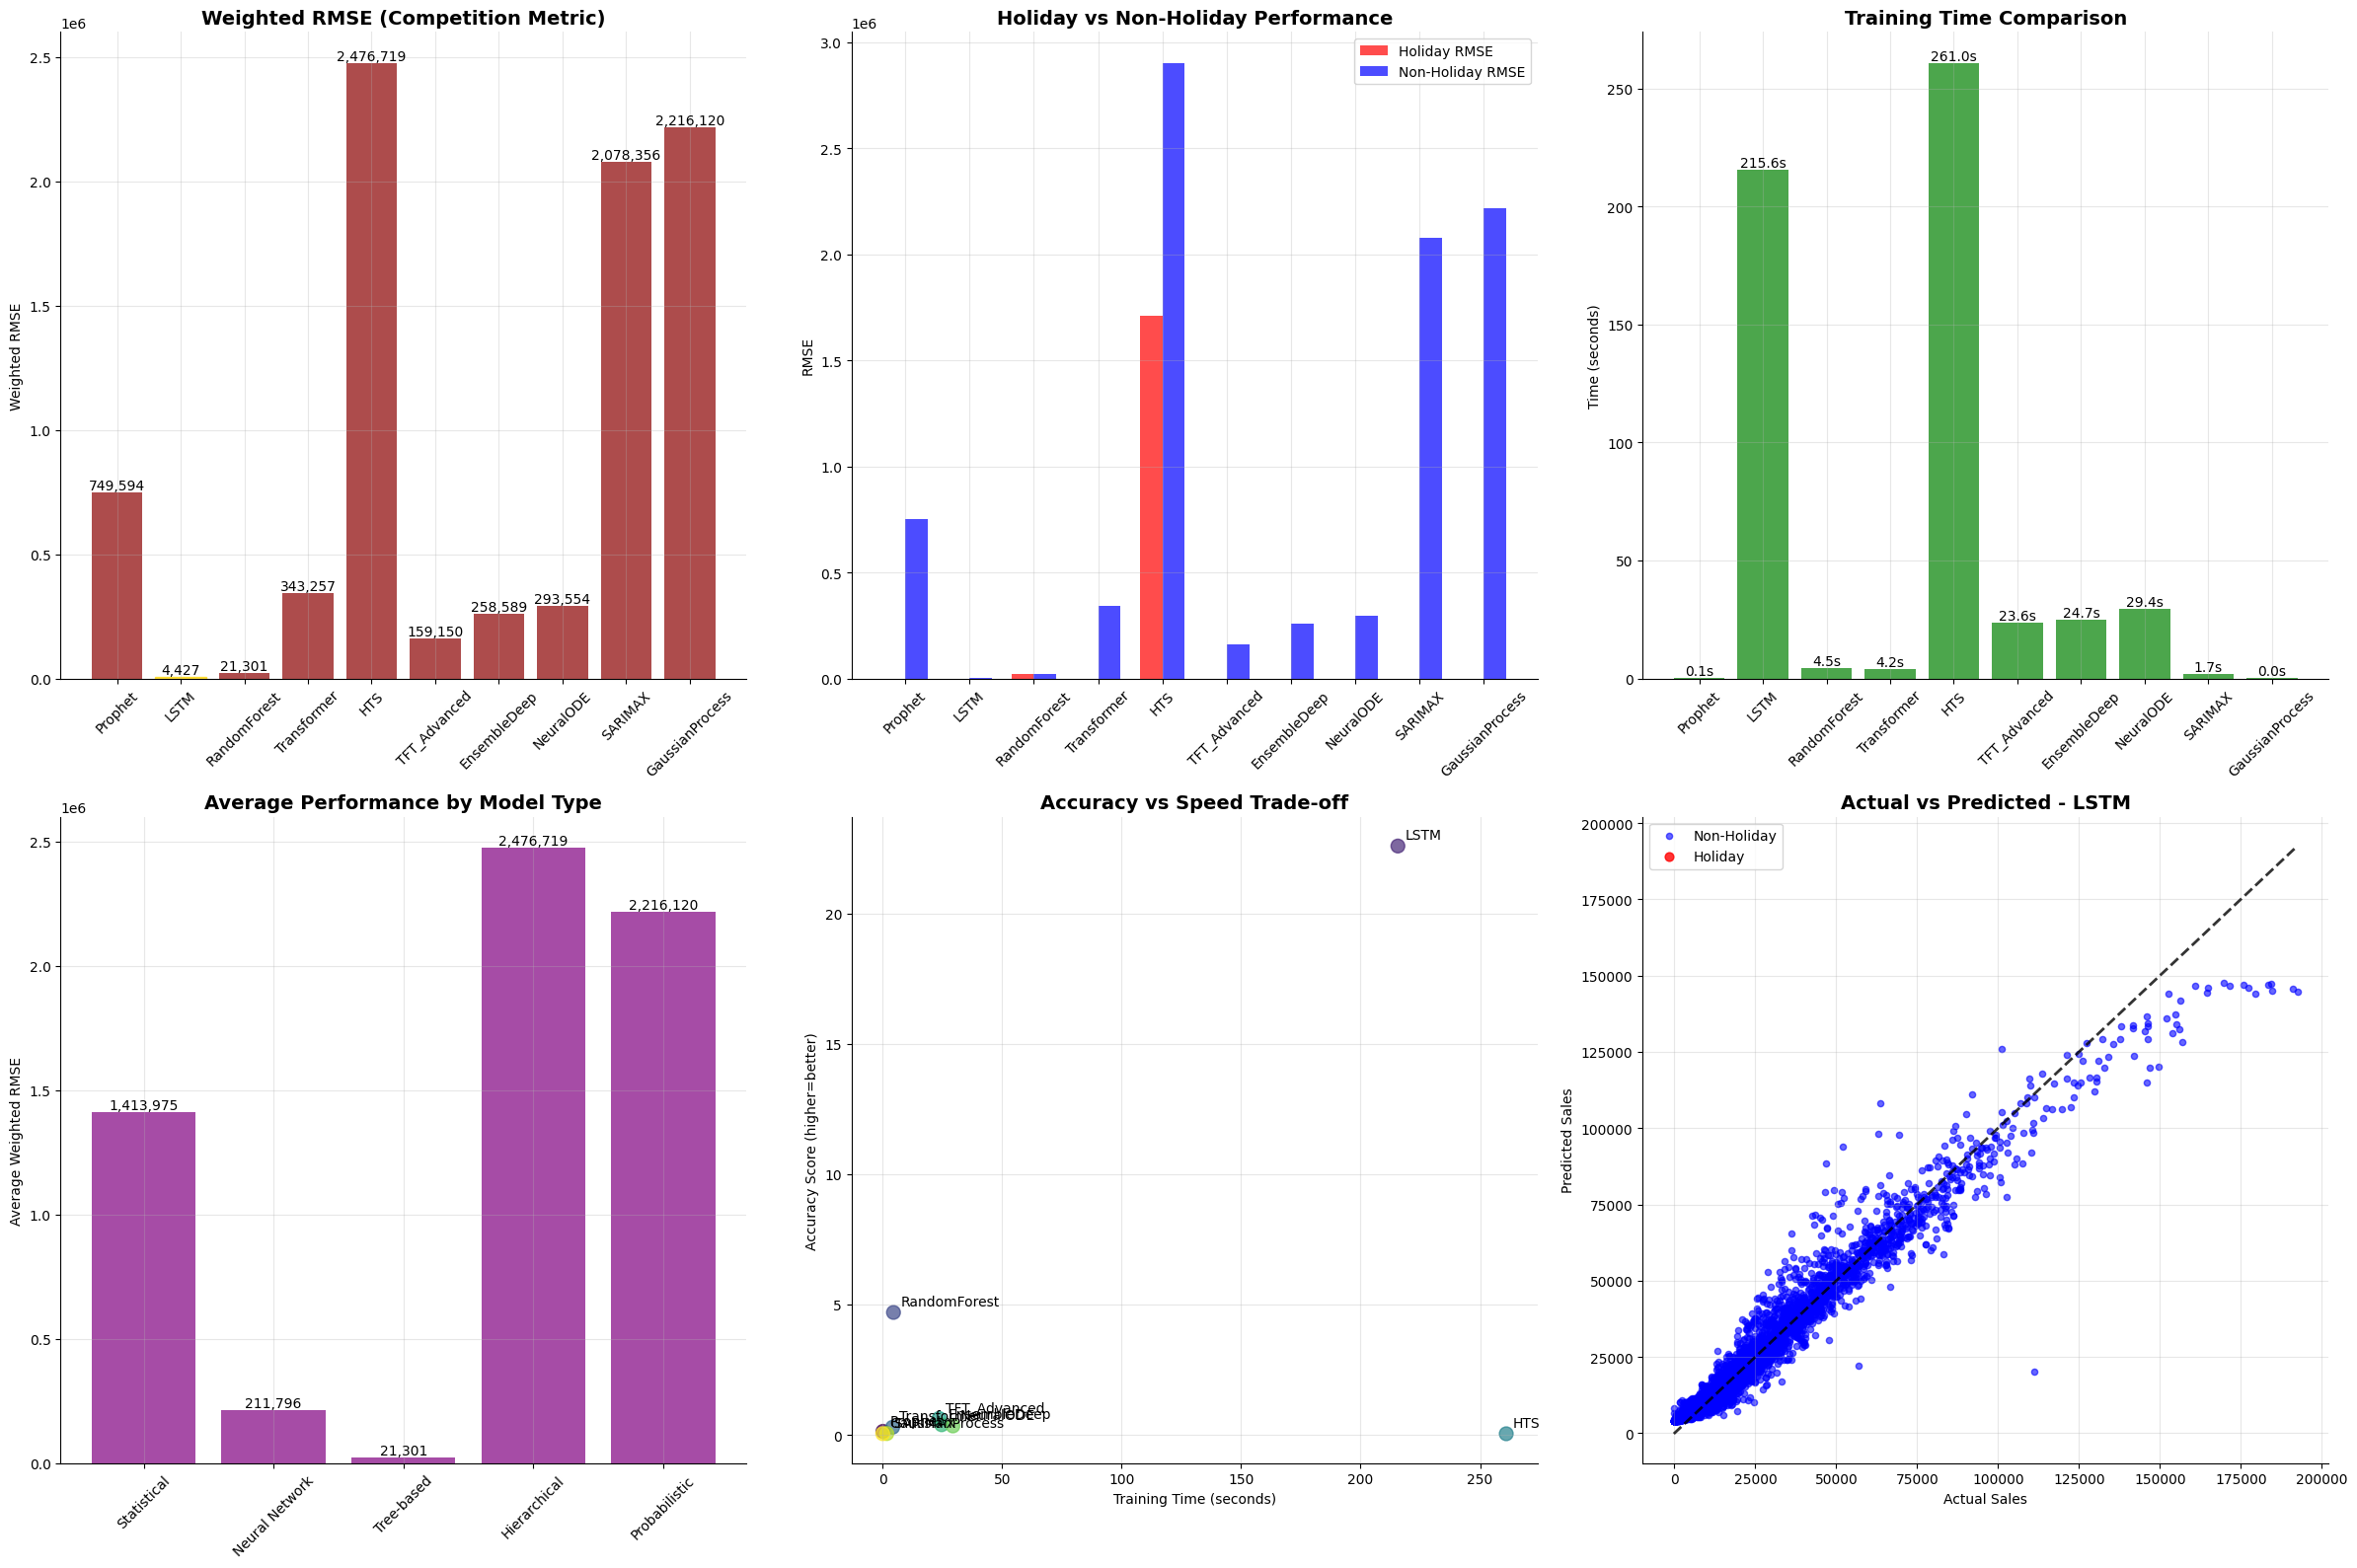

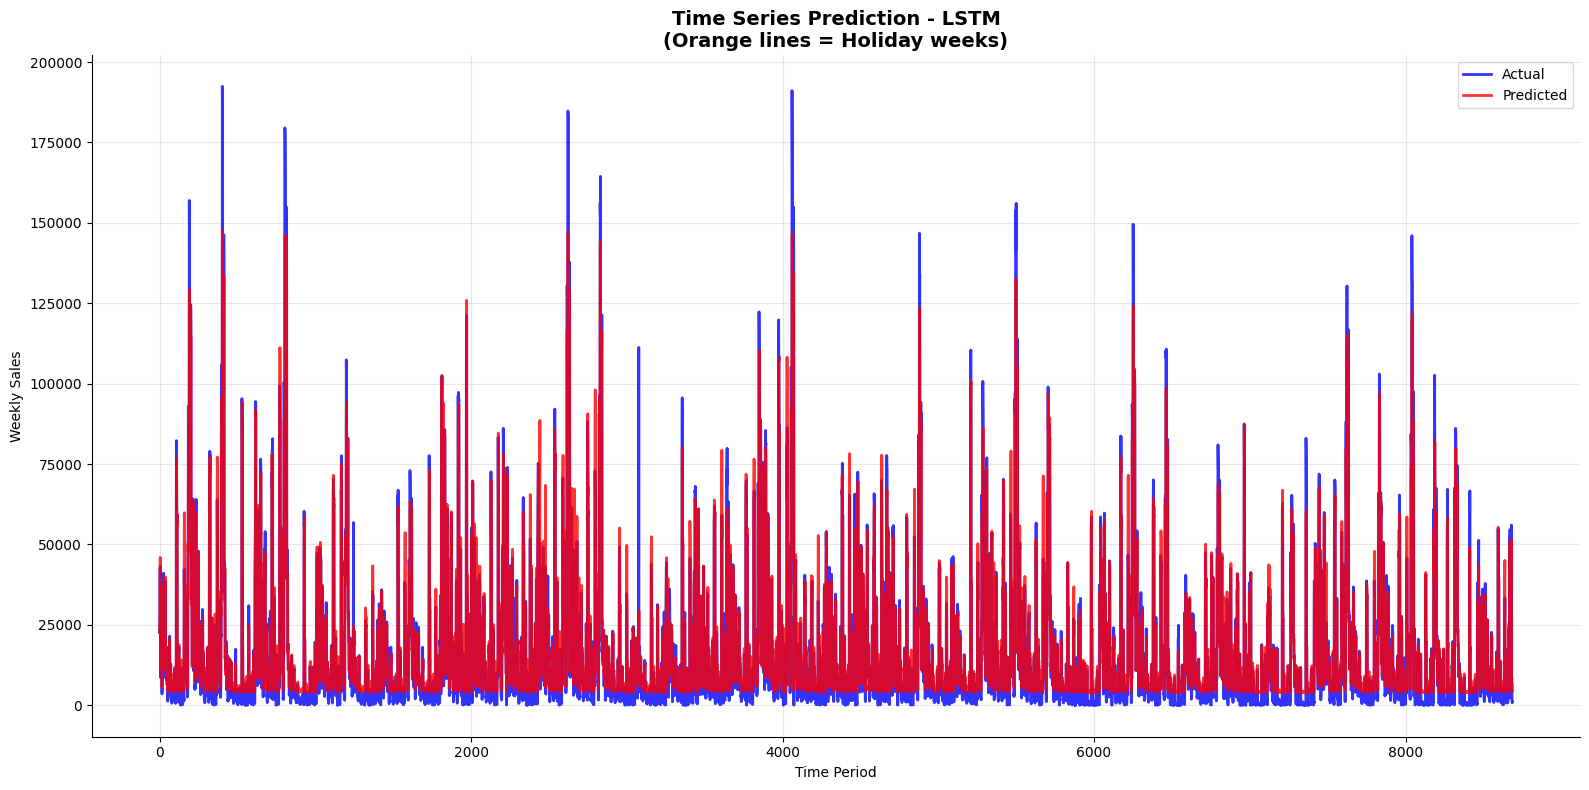


WALMART SALES FORECASTING - COMPREHENSIVE ANALYSIS REPORT

PERFORMANCE SUMMARY:
  Best Overall Accuracy (Weighted RMSE): LSTM
  Best Explanatory Power (R²): LSTM
  Fastest Training: GaussianProcess

COMPUTATIONAL COMPLEXITY:
  GaussianProcess: 0.05s (Probabilistic)
  Prophet: 0.13s (Statistical)
  SARIMAX: 1.74s (Statistical)
  Transformer: 4.18s (Neural Network)
  RandomForest: 4.54s (Tree-based)
  TFT_Advanced: 23.65s (Neural Network)
  EnsembleDeep: 24.69s (Neural Network)
  NeuralODE: 29.40s (Neural Network)
  LSTM: 215.62s (Neural Network)
  HTS: 260.96s (Hierarchical)

ACCURACY COMPARISON:
  LSTM: Weighted RMSE=4,427, R²=0.9579
  RandomForest: Weighted RMSE=21,301, R²=0.0886
  TFT_Advanced: Weighted RMSE=159,150, R²=0.9055
  EnsembleDeep: Weighted RMSE=258,589, R²=0.7504
  NeuralODE: Weighted RMSE=293,554, R²=0.6784
  Transformer: Weighted RMSE=343,257, R²=0.5603
  Prophet: Weighted RMSE=749,594, R²=0.7602
  SARIMAX: Weighted RMSE=2,078,356, R²=-0.8436
  GaussianProcess: Weighte

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import ttest_ind


class WalmartModelEvaluator:
    """Model evaluation with Walmart competition-specific metrics"""

    def __init__(self, results):
        self.results = results
        self.metrics = {}

    def calculate_walmart_metrics(self):
        """Calculate metrics with holiday weighting (key competition requirement)"""
        print("=== WALMART MODEL EVALUATION WITH HOLIDAY WEIGHTING ===")

        for model_name, result in self.results.items():
            if "predictions" not in result or len(result["predictions"]) == 0:
                continue

            actual = result["actual"]
            predicted = result["predictions"]
            weights = result.get("weights", np.ones(len(actual)))

            # Ensure same length
            min_len = min(len(actual), len(predicted), len(weights))
            actual = actual[:min_len]
            predicted = predicted[:min_len]
            weights = weights[:min_len]

            if min_len == 0:
                continue

            # Convert to numpy arrays
            actual = np.array(actual)
            predicted = np.array(predicted)
            weights = np.array(weights)

            # Standard metrics
            mse = mean_squared_error(actual, predicted)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(actual, predicted)

            # Weighted metrics (Walmart competition scoring)
            weighted_errors = weights * np.square(actual - predicted)
            weighted_mse = np.sum(weighted_errors) / np.sum(weights)
            weighted_rmse = np.sqrt(weighted_mse)

            weighted_ae = weights * np.abs(actual - predicted)
            weighted_mae = np.sum(weighted_ae) / np.sum(weights)

            # MAPE (handle division by zero)
            actual_nonzero = np.maximum(np.abs(actual), 1)  # Avoid division by zero
            mape = np.mean(np.abs((actual - predicted) / actual_nonzero)) * 100

            # Weighted MAPE
            weighted_ape = weights * np.abs((actual - predicted) / actual_nonzero)
            weighted_mape = (np.sum(weighted_ape) / np.sum(weights)) * 100

            # R-squared
            ss_res = np.sum((actual - predicted) ** 2)
            ss_tot = np.sum((actual - np.mean(actual)) ** 2)
            r2 = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

            # Holiday-specific performance
            holiday_mask = weights > 1
            if np.sum(holiday_mask) > 0:
                holiday_rmse = np.sqrt(
                    mean_squared_error(actual[holiday_mask], predicted[holiday_mask])
                )
                holiday_mape = (
                    np.mean(
                        np.abs(
                            (actual[holiday_mask] - predicted[holiday_mask])
                            / np.maximum(np.abs(actual[holiday_mask]), 1)
                        )
                    )
                    * 100
                )
            else:
                holiday_rmse = 0
                holiday_mape = 0

            # Non-holiday performance
            non_holiday_mask = weights == 1
            if np.sum(non_holiday_mask) > 0:
                non_holiday_rmse = np.sqrt(
                    mean_squared_error(
                        actual[non_holiday_mask], predicted[non_holiday_mask]
                    )
                )
                non_holiday_mape = (
                    np.mean(
                        np.abs(
                            (actual[non_holiday_mask] - predicted[non_holiday_mask])
                            / np.maximum(np.abs(actual[non_holiday_mask]), 1)
                        )
                    )
                    * 100
                )
            else:
                non_holiday_rmse = 0
                non_holiday_mape = 0

            # Directional accuracy
            if len(actual) > 1:
                actual_direction = np.diff(actual) > 0
                pred_direction = np.diff(predicted) > 0
                directional_accuracy = np.mean(actual_direction == pred_direction) * 100
            else:
                directional_accuracy = 0

            self.metrics[model_name] = {
                "RMSE": rmse,
                "MAE": mae,
                "MAPE": mape,
                "R2": r2,
                "Weighted_RMSE": weighted_rmse,  # Key Walmart metric
                "Weighted_MAE": weighted_mae,
                "Weighted_MAPE": weighted_mape,
                "Holiday_RMSE": holiday_rmse,
                "Holiday_MAPE": holiday_mape,
                "Non_Holiday_RMSE": non_holiday_rmse,
                "Non_Holiday_MAPE": non_holiday_mape,
                "Directional_Accuracy": directional_accuracy,
                "Training_Time": result["training_time"],
                "Model_Type": result["model_type"],
            }

            print(f"\n{model_name} Performance:")
            print(f"  Standard RMSE: {rmse:,.0f}")
            print(f"  Weighted RMSE: {weighted_rmse:,.0f} (Competition Metric)")
            print(f"  Holiday RMSE: {holiday_rmse:,.0f}")
            print(f"  Non-Holiday RMSE: {non_holiday_rmse:,.0f}")
            print(f"  Weighted MAPE: {weighted_mape:.2f}%")
            print(f"  R²: {r2:.4f}")
            print(f"  Directional Accuracy: {directional_accuracy:.2f}%")
            print(f"  Training Time: {result['training_time']:.2f}s")

        return self.metrics

    def sensitivity_analysis(self):
        """Perform sensitivity analysis"""
        print("\n=== SENSITIVITY ANALYSIS ===")

        sensitivity_results = {}

        for model_name, result in self.results.items():
            if "predictions" not in result or len(result["predictions"]) == 0:
                continue

            actual = result["actual"]
            predicted = result["predictions"]

            min_len = min(len(actual), len(predicted))
            actual = np.array(actual[:min_len])
            predicted = np.array(predicted[:min_len])

            if min_len == 0:
                continue

            # Calculate prediction volatility
            pred_volatility = np.std(predicted)
            actual_volatility = np.std(actual)

            # Sensitivity to outliers (using IQR)
            residuals = actual - predicted
            q75, q25 = np.percentile(residuals, [75, 25])
            iqr = q75 - q25
            outlier_sensitivity = len(
                residuals[(residuals < q25 - 1.5 * iqr) | (residuals > q75 + 1.5 * iqr)]
            ) / len(residuals)

            # Trend sensitivity
            if len(actual) > 1:
                actual_trend = np.polyfit(range(len(actual)), actual, 1)[0]
                pred_trend = np.polyfit(range(len(predicted)), predicted, 1)[0]
                trend_sensitivity = (
                    abs(actual_trend - pred_trend) / abs(actual_trend)
                    if actual_trend != 0
                    else 0
                )
            else:
                trend_sensitivity = 0

            # Mean absolute percentage error volatility
            mape_values = (
                np.abs((actual - predicted) / np.maximum(np.abs(actual), 1)) * 100
            )
            mape_volatility = np.std(mape_values)

            sensitivity_results[model_name] = {
                "Prediction_Volatility": pred_volatility,
                "Volatility_Ratio": (
                    pred_volatility / actual_volatility if actual_volatility != 0 else 0
                ),
                "Outlier_Sensitivity": outlier_sensitivity * 100,
                "Trend_Sensitivity": trend_sensitivity * 100,
                "MAPE_Volatility": mape_volatility,
            }

            print(f"\n{model_name} Sensitivity:")
            print(f"  Prediction Volatility: {pred_volatility:,.2f}")
            print(f"  Volatility Ratio: {pred_volatility / actual_volatility:.4f}")
            print(f"  Outlier Sensitivity: {outlier_sensitivity * 100:.2f}%")
            print(f"  Trend Sensitivity: {trend_sensitivity * 100:.2f}%")
            print(f"  MAPE Volatility: {mape_volatility:.2f}%")

        return sensitivity_results

    def forecast_horizon_analysis(self):
        """Analyze performance across different forecast horizons"""
        print("\n=== FORECAST HORIZON ANALYSIS ===")

        horizon_results = {}

        for model_name, result in self.results.items():
            if "predictions" not in result or len(result["predictions"]) == 0:
                continue

            actual = np.array(result["actual"])
            predicted = np.array(result["predictions"])

            min_len = min(len(actual), len(predicted))
            if min_len < 12:
                continue

            # Short-term (1-4 steps ahead)
            short_actual = actual[:4]
            short_pred = predicted[:4]
            short_mape = (
                np.mean(
                    np.abs(
                        (short_actual - short_pred)
                        / np.maximum(np.abs(short_actual), 1)
                    )
                )
                * 100
            )

            # Medium-term (5-8 steps ahead)
            if min_len >= 8:
                med_actual = actual[4:8]
                med_pred = predicted[4:8]
                med_mape = (
                    np.mean(
                        np.abs(
                            (med_actual - med_pred) / np.maximum(np.abs(med_actual), 1)
                        )
                    )
                    * 100
                )
            else:
                med_mape = np.nan

            # Long-term (9+ steps ahead)
            if min_len >= 12:
                long_actual = actual[8:12]
                long_pred = predicted[8:12]
                long_mape = (
                    np.mean(
                        np.abs(
                            (long_actual - long_pred)
                            / np.maximum(np.abs(long_actual), 1)
                        )
                    )
                    * 100
                )
            else:
                long_mape = np.nan

            horizon_results[model_name] = {
                "Short_Term_MAPE": short_mape,
                "Medium_Term_MAPE": med_mape,
                "Long_Term_MAPE": long_mape,
            }

            print(f"\n{model_name} Horizon Performance:")
            print(f"  Short-term MAPE (1-4 steps): {short_mape:.2f}%")
            if not np.isnan(med_mape):
                print(f"  Medium-term MAPE (5-8 steps): {med_mape:.2f}%")
            if not np.isnan(long_mape):
                print(f"  Long-term MAPE (9-12 steps): {long_mape:.2f}%")

        return horizon_results

    def walmart_model_comparison(self):
        """Comprehensive model comparison for Walmart competition"""
        print("\n" + "=" * 80)
        print("WALMART MODEL COMPARISON - COMPETITION PERSPECTIVE")
        print("=" * 80)

        if not self.metrics:
            print("No metrics available for comparison.")
            return {}

        # Rank by weighted RMSE (competition metric)
        weighted_rmse_ranking = sorted(
            self.metrics.items(), key=lambda x: x[1]["Weighted_RMSE"]
        )

        print("\nCOMPETITION RANKING (by Weighted RMSE):")
        for i, (model, metrics) in enumerate(weighted_rmse_ranking, 1):
            print(f"  {i}. {model}: {metrics['Weighted_RMSE']:,.0f}")

        # Holiday vs Non-Holiday Performance
        print(f"\nHOLIDAY PERFORMANCE ANALYSIS:")
        holiday_performance = []
        for model, metrics in self.metrics.items():
            if metrics["Holiday_RMSE"] > 0:
                holiday_performance.append((model, metrics["Holiday_RMSE"]))

        holiday_performance.sort(key=lambda x: x[1])
        for i, (model, rmse) in enumerate(holiday_performance, 1):
            print(f"  {i}. {model}: {rmse:,.0f} RMSE")

        # Model Type Analysis
        print(f"\nMODEL TYPE PERFORMANCE:")
        type_performance = {}
        for model, metrics in self.metrics.items():
            model_type = metrics["Model_Type"]
            if model_type not in type_performance:
                type_performance[model_type] = []
            type_performance[model_type].append(metrics["Weighted_RMSE"])

        for model_type, rmse_list in type_performance.items():
            avg_rmse = np.mean(rmse_list)
            print(f"  {model_type}: {avg_rmse:,.0f} avg Weighted RMSE")

        # Best model identification
        best_model = weighted_rmse_ranking[0][0]
        best_metrics = weighted_rmse_ranking[0][1]

        print(f"\nBEST MODEL FOR WALMART COMPETITION:")
        print(f"  Model: {best_model}")
        print(f"  Weighted RMSE: {best_metrics['Weighted_RMSE']:,.0f}")
        print(f"  Holiday Performance: {best_metrics['Holiday_RMSE']:,.0f} RMSE")
        print(f"  Training Time: {best_metrics['Training_Time']:.2f}s")
        print(f"  Model Type: {best_metrics['Model_Type']}")

        return {
            "best_model": best_model,
            "ranking": weighted_rmse_ranking,
            "type_performance": type_performance,
        }

    def visualize_walmart_results(self):
        """Create Walmart-specific visualizations"""
        if not self.metrics:
            print("No metrics available for visualization.")
            return

        fig, axes = plt.subplots(2, 3, figsize=(24, 16))

        models = list(self.metrics.keys())

        # 1. Weighted RMSE Comparison (Key Competition Metric)
        weighted_rmse_values = [self.metrics[m]["Weighted_RMSE"] for m in models]
        bars = axes[0, 0].bar(models, weighted_rmse_values, color="darkred", alpha=0.7)
        axes[0, 0].set_title(
            "Weighted RMSE (Competition Metric)", fontweight="bold", fontsize=14
        )
        axes[0, 0].set_ylabel("Weighted RMSE")
        axes[0, 0].tick_params(axis="x", rotation=45)
        axes[0, 0].grid(True, alpha=0.3)

        # Highlight best model
        best_idx = weighted_rmse_values.index(min(weighted_rmse_values))
        bars[best_idx].set_color("gold")

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[0, 0].text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
            )

        # 2. Holiday vs Non-Holiday Performance
        holiday_rmse = [self.metrics[m]["Holiday_RMSE"] for m in models]
        non_holiday_rmse = [self.metrics[m]["Non_Holiday_RMSE"] for m in models]

        x = np.arange(len(models))
        width = 0.35

        axes[0, 1].bar(
            x - width / 2,
            holiday_rmse,
            width,
            label="Holiday RMSE",
            color="red",
            alpha=0.7,
        )
        axes[0, 1].bar(
            x + width / 2,
            non_holiday_rmse,
            width,
            label="Non-Holiday RMSE",
            color="blue",
            alpha=0.7,
        )
        axes[0, 1].set_title(
            "Holiday vs Non-Holiday Performance", fontweight="bold", fontsize=14
        )
        axes[0, 1].set_ylabel("RMSE")
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(models, rotation=45)
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)

        # 3. Training Time Comparison
        training_times = [self.metrics[m]["Training_Time"] for m in models]
        bars = axes[0, 2].bar(models, training_times, color="green", alpha=0.7)
        axes[0, 2].set_title("Training Time Comparison", fontweight="bold", fontsize=14)
        axes[0, 2].set_ylabel("Time (seconds)")
        axes[0, 2].tick_params(axis="x", rotation=45)
        axes[0, 2].grid(True, alpha=0.3)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[0, 2].text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f"{height:.1f}s",
                ha="center",
                va="bottom",
            )

        # 4. Model Type Performance
        type_performance = {}
        for model, metrics in self.metrics.items():
            model_type = metrics["Model_Type"]
            if model_type not in type_performance:
                type_performance[model_type] = []
            type_performance[model_type].append(metrics["Weighted_RMSE"])

        type_names = list(type_performance.keys())
        type_rmse = [np.mean(type_performance[t]) for t in type_names]

        bars = axes[1, 0].bar(type_names, type_rmse, color="purple", alpha=0.7)
        axes[1, 0].set_title(
            "Average Performance by Model Type", fontweight="bold", fontsize=14
        )
        axes[1, 0].set_ylabel("Average Weighted RMSE")
        axes[1, 0].tick_params(axis="x", rotation=45)
        axes[1, 0].grid(True, alpha=0.3)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[1, 0].text(
                bar.get_x() + bar.get_width() / 2.0,
                height,
                f"{height:,.0f}",
                ha="center",
                va="bottom",
            )

        # 5. Accuracy vs Speed Trade-off
        accuracy_scores = [
            1 / self.metrics[m]["Weighted_RMSE"] * 100000 for m in models
        ]  # Inverse for better=higher

        scatter = axes[1, 1].scatter(
            training_times,
            accuracy_scores,
            s=100,
            alpha=0.7,
            c=range(len(models)),
            cmap="viridis",
        )
        for i, model in enumerate(models):
            axes[1, 1].annotate(
                model,
                (training_times[i], accuracy_scores[i]),
                xytext=(5, 5),
                textcoords="offset points",
                fontsize=10,
            )

        axes[1, 1].set_xlabel("Training Time (seconds)")
        axes[1, 1].set_ylabel("Accuracy Score (higher=better)")
        axes[1, 1].set_title(
            "Accuracy vs Speed Trade-off", fontweight="bold", fontsize=14
        )
        axes[1, 1].grid(True, alpha=0.3)

        # 6. Actual vs Predicted for Best Model
        best_model = min(
            self.metrics.keys(), key=lambda x: self.metrics[x]["Weighted_RMSE"]
        )
        if best_model in self.results and "predictions" in self.results[best_model]:
            result = self.results[best_model]
            actual = np.array(result["actual"])
            predicted = np.array(result["predictions"])
            weights = np.array(result.get("weights", np.ones(len(actual))))

            min_len = min(len(actual), len(predicted))
            actual = actual[:min_len]
            predicted = predicted[:min_len]
            weights = weights[:min_len]

            # Color points by holiday status
            holiday_mask = weights > 1

            axes[1, 2].scatter(
                actual[~holiday_mask],
                predicted[~holiday_mask],
                alpha=0.6,
                color="blue",
                label="Non-Holiday",
                s=20,
            )
            axes[1, 2].scatter(
                actual[holiday_mask],
                predicted[holiday_mask],
                alpha=0.8,
                color="red",
                label="Holiday",
                s=40,
            )

            # Perfect prediction line
            min_val, max_val = min(actual.min(), predicted.min()), max(
                actual.max(), predicted.max()
            )
            axes[1, 2].plot(
                [min_val, max_val], [min_val, max_val], "k--", alpha=0.8, linewidth=2
            )

            axes[1, 2].set_xlabel("Actual Sales")
            axes[1, 2].set_ylabel("Predicted Sales")
            axes[1, 2].set_title(
                f"Actual vs Predicted - {best_model}", fontweight="bold", fontsize=14
            )
            axes[1, 2].legend()
            axes[1, 2].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_time_series_predictions(self):
        """Plot time series predictions for the best model"""
        if not self.metrics:
            return

        best_model = min(
            self.metrics.keys(), key=lambda x: self.metrics[x]["Weighted_RMSE"]
        )

        if (
            best_model not in self.results
            or "predictions" not in self.results[best_model]
        ):
            return

        result = self.results[best_model]
        actual = np.array(result["actual"])
        predicted = np.array(result["predictions"])
        weights = np.array(result.get("weights", np.ones(len(actual))))

        min_len = min(len(actual), len(predicted), len(weights))
        actual = actual[:min_len]
        predicted = predicted[:min_len]
        weights = weights[:min_len]

        plt.figure(figsize=(16, 8))

        # Plot actual vs predicted
        time_points = range(len(actual))
        plt.plot(
            time_points, actual, label="Actual", linewidth=2, alpha=0.8, color="blue"
        )
        plt.plot(
            time_points,
            predicted,
            label="Predicted",
            linewidth=2,
            alpha=0.8,
            color="red",
        )

        # Highlight holiday periods
        holiday_points = np.where(weights > 1)[0]
        for point in holiday_points:
            plt.axvline(x=point, color="orange", alpha=0.3, linestyle="--", linewidth=1)

        plt.xlabel("Time Period")
        plt.ylabel("Weekly Sales")
        plt.title(
            f"Time Series Prediction - {best_model}\n(Orange lines = Holiday weeks)",
            fontweight="bold",
            fontsize=14,
        )
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def generate_summary_report(self):
        """Generate comprehensive summary report"""
        print("\n" + "=" * 80)
        print("WALMART SALES FORECASTING - COMPREHENSIVE ANALYSIS REPORT")
        print("=" * 80)

        if not self.metrics:
            print("No metrics available for report generation.")
            return

        # Best performing models
        best_rmse = min(
            self.metrics.keys(), key=lambda x: self.metrics[x]["Weighted_RMSE"]
        )
        best_r2 = max(self.metrics.keys(), key=lambda x: self.metrics[x]["R2"])
        fastest_model = min(
            self.metrics.keys(), key=lambda x: self.metrics[x]["Training_Time"]
        )

        print(f"\nPERFORMANCE SUMMARY:")
        print(f"  Best Overall Accuracy (Weighted RMSE): {best_rmse}")
        print(f"  Best Explanatory Power (R²): {best_r2}")
        print(f"  Fastest Training: {fastest_model}")

        print(f"\nCOMPUTATIONAL COMPLEXITY:")
        for model, metrics in sorted(
            self.metrics.items(), key=lambda x: x[1]["Training_Time"]
        ):
            print(
                f"  {model}: {metrics['Training_Time']:.2f}s ({metrics['Model_Type']})"
            )

        print(f"\nACCURACY COMPARISON:")
        for model, metrics in sorted(
            self.metrics.items(), key=lambda x: x[1]["Weighted_RMSE"]
        ):
            print(
                f"  {model}: Weighted RMSE={metrics['Weighted_RMSE']:,.0f}, R²={metrics['R2']:.4f}"
            )

        print(f"\nKEY INSIGHTS:")

        # Neural network vs statistical comparison
        nn_models = [
            m
            for m, met in self.metrics.items()
            if met["Model_Type"] == "Neural Network"
        ]
        stat_models = [
            m for m, met in self.metrics.items() if met["Model_Type"] == "Statistical"
        ]

        if nn_models and stat_models:
            nn_avg_rmse = np.mean([self.metrics[m]["Weighted_RMSE"] for m in nn_models])
            stat_avg_rmse = np.mean(
                [self.metrics[m]["Weighted_RMSE"] for m in stat_models]
            )

            if nn_avg_rmse < stat_avg_rmse:
                print(
                    f"  Neural Networks outperform Statistical models (avg Weighted RMSE: {nn_avg_rmse:,.0f} vs {stat_avg_rmse:,.0f})"
                )
            else:
                print(
                    f"  Statistical models outperform Neural Networks (avg Weighted RMSE: {stat_avg_rmse:,.0f} vs {nn_avg_rmse:,.0f})"
                )

        # Holiday performance analysis
        holiday_performers = [
            (m, met["Holiday_RMSE"])
            for m, met in self.metrics.items()
            if met["Holiday_RMSE"] > 0
        ]
        if holiday_performers:
            best_holiday_model = min(holiday_performers, key=lambda x: x[1])[0]
            print(f"  Best Holiday Performance: {best_holiday_model}")

        print(f"\nRECOMMENDATIONS:")
        print(f"  For PRODUCTION use: {best_rmse} (best competition score)")
        print(f"  For RAPID PROTOTYPING: {fastest_model} (fastest training)")
        print(f"  For INTERPRETABILITY: Prophet or RandomForest (explainable models)")
        print(
            f"  Focus on HOLIDAY WEEKS: They dominate competition scoring (5x weight)"
        )


# Usage example:
if __name__ == "__main__":
    from src.data_loader import WalmartDataLoader
    from src.data_processing import WalmartComprehensiveEDA
    from src.feature_engineering import WalmartFeatureEngineering
    from src.forecasting_models import WalmartForecastingModels
    from src.hierarchical_time_series_model import HierarchicalTimeSeriesModel
    from src.advanced_forecasting_models import AdvancedWalmartForecastingModels

    data_loader = WalmartDataLoader()
    data_loader.load_data()
    train_data = data_loader.train_data
    test_data = data_loader.test_data
    features_data = data_loader.features_data
    stores_data = data_loader.stores_data

    # Assuming you have data from WalmartDataLoader
    eda = WalmartComprehensiveEDA(train_data, test_data, features_data, stores_data)
    merged_data = eda.merge_datasets()

    feature_eng = WalmartFeatureEngineering(merged_data)
    processed_data = feature_eng.create_walmart_features()
    processed_data = feature_eng.handle_missing_values()
    print("Feature Engineering class ready!")

    # basic models
    forecasting_models = WalmartForecastingModels(processed_data)
    train_data, val_data = forecasting_models.prepare_walmart_data()
    prophet_model, prophet_pred = forecasting_models.prophet_walmart_model()
    lstm_model, lstm_pred = forecasting_models.lstm_walmart_model()
    rf_model, rf_pred = forecasting_models.random_forest_walmart_model()
    trans_model, trans_pred = forecasting_models.transformer_walmart_model()

    # hierarchical time series model
    hts_model = HierarchicalTimeSeriesModel(processed_data)
    train_data, val_data = hts_model.prepare_hierarchical_data()
    model, predictions = hts_model.hierarchical_time_series_model()

    # advanced models
    advanced_models = AdvancedWalmartForecastingModels(processed_data)
    train_data, val_data = advanced_models.prepare_data()

    # train various models
    tft_model, tft_pred = advanced_models.temporal_fusion_transformer_advanced()
    ensemble_model, ensemble_pred = advanced_models.ensemble_deep_learning_model()
    ode_model, ode_pred = advanced_models.neural_ode_model()
    sarimax_model, sarimax_pred = advanced_models.state_space_model()
    gp_model, gp_pred = advanced_models.gaussian_process_model()

    # results aggregation
    forecasting_results = forecasting_models.results
    hts_model_results = hts_model.results
    advanced_results = advanced_models.results
    forecasting_results.update(hts_model_results)
    forecasting_results.update(advanced_results)

    # evaluation
    evaluator = WalmartModelEvaluator(forecasting_results)
    metrics = evaluator.calculate_walmart_metrics()
    sensitivity = evaluator.sensitivity_analysis()
    horizon = evaluator.forecast_horizon_analysis()
    comparison = evaluator.walmart_model_comparison()
    evaluator.visualize_walmart_results()
    evaluator.plot_time_series_predictions()
    evaluator.generate_summary_report()
    print("Model Evaluator class ready!")